In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

# Set the random seed for reproducibility
np.random.seed(2417)


In [2]:
myData = pd.read_csv("Coding2_Data.csv")
var_names = myData.columns
y = myData[['Y']].to_numpy()
X = myData.drop(['Y'], axis = 1).to_numpy()
X.shape, len(y)

((506, 13), 506)

In [3]:
def one_var_lasso(v, x, lam):
    nv = len(v)
    alpha = np.dot(v,x)/(np.linalg.norm(x)**2)
    rho = nv*lam/(np.linalg.norm(x)**2)
    if alpha > rho:
        return(alpha-rho)
    elif alpha < -rho:
        return(alpha + rho)
    else:
        return 0.0

(14, 80)


(-8.35, -0.6499999999999999, -0.30999368240557323, 0.4997421559471167)

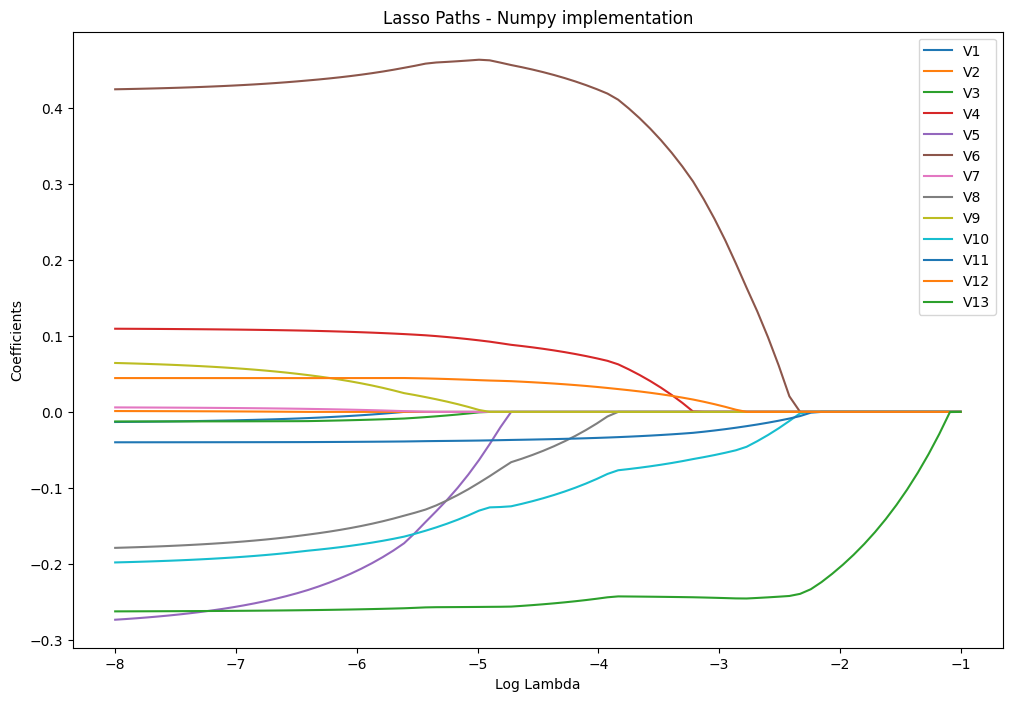

In [4]:
def MyLasso(X_input, y_input, lam_seq, maxit):
    
    # Input
    # X: n-by-p design matrix without the intercept 
    # y: n-by-1 response vector 
    # lam.seq: sequence of lambda values (arranged from large to small)
    # maxit: number of updates for each lambda 
    
    # Output
    # B: a (p+1)-by-len(lam.seq) coefficient matrix with the first row being the intercept sequence 
    
    X = X_input
    n, p = X.shape
    nlam = len(lam_seq)
    B = np.zeros((p+1, nlam))
    y = y_input.reshape(n,) # (506,)

    
    # Standardize X by centering and scaling each column 
    meanX = X.mean(0) # meanX = mean of each column, [1, 13]
    stdX = X.std(0) # stdX = standard deviation of each column, [1, 13]
    newX = (X-meanX)/stdX # [506, 13]
    
    # Initilize coef vector b and residual vector v
    b = np.zeros(p)
#    v = y
    
    count = 0
    meanY = y.mean(0) # (1,)
    
    # Triple nested loop
    for m in range(nlam):
        b = np.zeros(p)
        #v = y
        for step in range(maxit):
            for j in range(p):
                X_j = newX[:, j].reshape(n,)  # (506,)
                yp = np.dot(newX, b).reshape(n,) # (506,13)*(13,) = (506,)
                v = y - yp + X_j * b[j]  # (506,)-(506,)+(506,)=(506,)
                b[j] = one_var_lasso(v, X_j, lam_seq[m]) 
        B[1:, m] = b / stdX #+ meanX # b:(13,), std(13,)
        B[0, m] = meanY - np.dot(meanX, B[1:, m])
    
    return(B)

log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq , maxit = 100)

p, _ = myout.shape
print(myout.shape)
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

#plt.plot(np.ones(13)*(-1),meanX,'*')
    
plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [6]:
lasso_coef = pd.read_csv("Coding2_lasso_coefs.csv").to_numpy()
print(lasso_coef.shape)
print(abs(myout - lasso_coef).max())

(14, 80)
0.0046473537321896075
